> The equations are as follows (From J. Murray)

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + u(a-u)(u-1) - v + I_a$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + bu - \gamma v$</center></h3>

By seeting $a=-1$ and swapping $u$ and $v$ and renaming $I_a$ as $\sigma$ and more importantly, include a new parameters, $\mu$, we find

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + \mu u - u^3 - v + \sigma$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v +bu - \gamma v $</center></h3>

With parameters  :
- $D_u = 0.00028, \quad D_v=0.05$.
- $b = 1.0$.
- $\gamma = 1.0$.
- $\sigma = 0.1$.
- $\mu = 1.0$.

In [1]:
%config Completer.use_jedi = False
import numpy as np
import numba
import sys
sys.path.append("/end/home/rh2310/morpho_repo/turing_codebase")
from solvers.explicit_Euler import integrate
from solvers.turing_models import FitzHugh_Nagumo

from matplotlib import pyplot as plt

In [7]:
n = (32, 32)
L = (0.08, 0.08)



Ds = np.array([0.00028, 0.05])
b = 1.0#6.45
gamma = 1.0#6.45
sigma = 0.1#.1
mu = 1.00#1.5

def find_ss(sigma, b, gamma, mu, init_u = 1.0, it=100):
    def F(u):
        return u * u * u - (mu - (b / gamma)) * u - sigma
    def F_prime(u):
        return 3.0 * u * u - (mu - (b / gamma))
    u_star = init_u
    for i in range(it):        
        u_star = u_star - F(u_star)/F_prime(u_star)
    return (u_star, (b / gamma) * u_star)

f_args = (sigma, b, gamma, mu)
t = np.linspace(0, 600, 512)

np.random.seed(42)
c0 = np.random.normal(scale=0.05, size=(2, n[0], n[1]))
#u_star, v_star = find_ss(sigma, b, gamma, mu)
#c0[0, :, : ] += u_star
#c0[0, :, : ] += v_star

dt = 0.001

sol = integrate(c0, t, dt, n, L, Ds, FitzHugh_Nagumo, f_args)


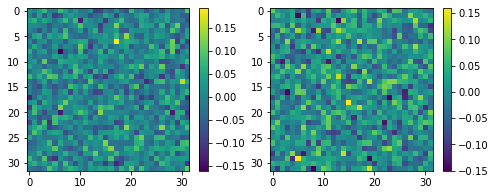

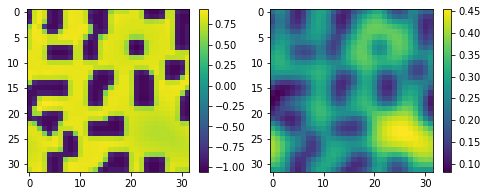

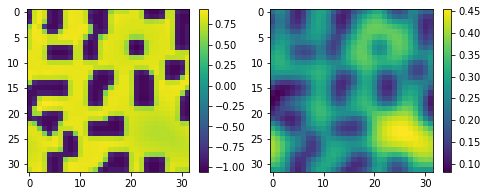

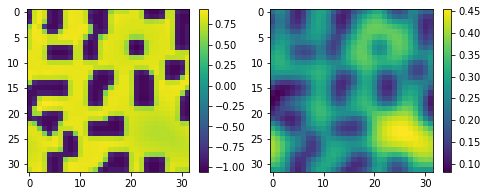

In [8]:
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, 0])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, 0])
plt.colorbar(shrink=.75)

_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, -1])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, -1])
plt.colorbar(shrink=.75)

_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, -5])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, -5])
plt.colorbar(shrink=.75)

_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, -256])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, -256])
plt.colorbar(shrink=.75)

In [10]:
with open('../turing_FitzHugh_Nagumo.npy', 'wb') as f:
    np.save(f, sol)
    
with open('../turing_t_FitzHugh_Nagumo.npy', 'wb') as f:
    np.save(f, t)

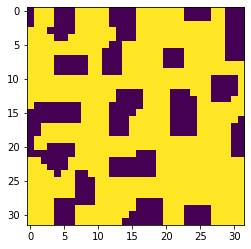

In [9]:
from matplotlib.animation import FuncAnimation


fig = plt.figure()

im = im=plt.imshow(sol[0, :,:,0])#  ,interpolation='none')
def init():
    im.set_data(sol[0, :,:,0])
    return [im]
    
def animate(i):    
    a=im.get_array()
    a=sol[0, :,:,i] 
    im.set_array(sol[0, :,:,i] )
    return [im]

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(t), interval=100, blit=True)


anim.save('turring_FitzHugh_Nagumo2.gif', writer='imagemagick')

In [50]:
np.sqrt(0.00298872)

0.05466918693377468

In [84]:
b2 = 0.6737932571#0.7491525872#
gamma2 = 0.6107309040#1.0685101624#
mu2 = 1.0230019142#1.1906803023#
sigma2 = 0.0713196962#0.0588216532#

b2 = 0.70831 
gamma2 = 0.65213 
mu2 = 1.01929 
sigma2 = 0.07220 

f_args2 = (sigma2, b2, gamma2, mu2)

sol2 = integrate(c0.copy(), t, dt, n, L, Ds, FitzHugh_Nagumo, f_args2)


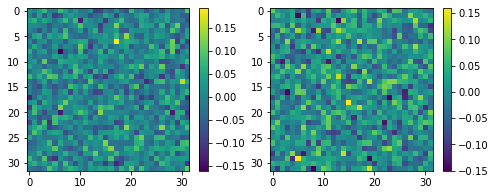

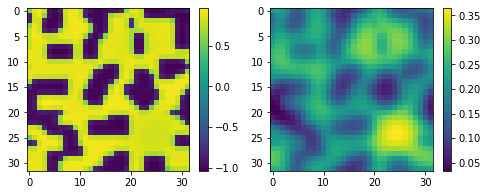

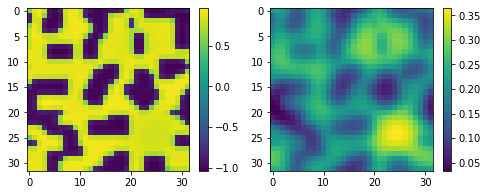

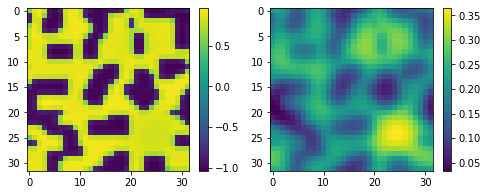

In [85]:
_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol2[0,:,:, 0])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol2[1,:,:, 0])
plt.colorbar(shrink=.75)

_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol2[0,:,:, -1])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol2[1,:,:, -1])
plt.colorbar(shrink=.75)

_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol2[0,:,:, -5])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol2[1,:,:, -5])
plt.colorbar(shrink=.75)

_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol2[0,:,:, -256])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol2[1,:,:, -256])
plt.colorbar(shrink=.75)

0.4417523727846557
0.07394189472203104


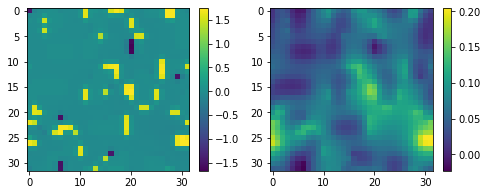

In [87]:
print(np.sqrt(np.mean((sol[0,:,:, -1]-sol2[0,:,:, -1])**2)))
print(np.sqrt(np.mean((sol[1,:,:, -1]-sol2[1,:,:, -1])**2)))

_ = plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(sol[0,:,:, -1]-sol2[0,:,:, -1])
plt.colorbar(shrink=.75)
plt.subplot(122)
plt.imshow(sol[1,:,:, -1]-sol2[1,:,:, -1])
plt.colorbar(shrink=.75)